# Data Analysis and Visualization of Student Mental Health

In [2]:
# import modules

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


C:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exploring the Data

In [3]:
df = pd.read_csv("student-mental.csv")
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
columns = df.columns
columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [6]:
df[columns].nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df = df.drop('Timestamp',axis=1)


df.head(3)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Date,Month,Year
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,2020-08-07 12:02:00,8,2020
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,2020-08-07 12:04:00,8,2020
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,2020-08-07 12:05:00,8,2020


In [8]:
df = df.drop('Date',axis=1)
df

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Month,Year
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,8,2020
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,8,2020
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,8,2020
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,8,2020
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No,7,2020
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No,7,2020
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No,7,2020
99,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No,7,2020


In [9]:
df['What is your course?'].value_counts().head()

BCS                   18
Engineering           17
BIT                   10
Biomedical science     4
KOE                    4
Name: What is your course?, dtype: int64

In [10]:
df['Your current year of Study'].value_counts()

year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: Your current year of Study, dtype: int64

In [11]:
df['Your current year of Study'] = df['Your current year of Study'].replace('Year 1', 'year 1')
df['Your current year of Study'] = df['Your current year of Study'].replace('Year 2', 'year 2')
df['Your current year of Study'] = df['Your current year of Study'].replace('Year 3', 'year 3')
df['Your current year of Study'].value_counts()

year 1    43
year 2    26
year 3    24
year 4     8
Name: Your current year of Study, dtype: int64

(array([43.,  0.,  0., 26.,  0.,  0., 24.,  0.,  0.,  8.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

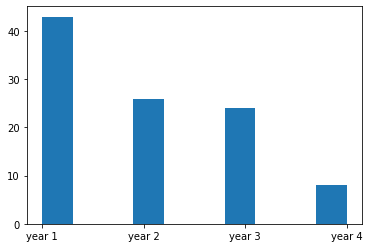

In [22]:
plt.hist(df["Your current year of Study"])

In [12]:
df['What is your CGPA?'].value_counts()

3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: What is your CGPA?, dtype: int64

In [13]:
df['What is your CGPA?'] = df['What is your CGPA?'].replace('3.50 - 4.00 ', '3.50 - 4.00')
df['What is your CGPA?'].value_counts()

3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: What is your CGPA?, dtype: int64

In [14]:
df["Age"].value_counts()

18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: Age, dtype: int64

(array([32., 21.,  0.,  6.,  0.,  3.,  2.,  0., 13., 23.]),
 array([18. , 18.6, 19.2, 19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. ]),
 <BarContainer object of 10 artists>)

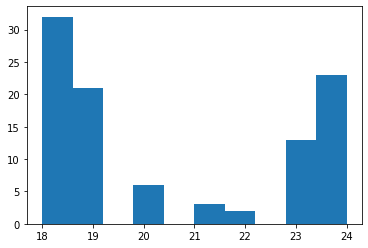

In [20]:
plt.hist(df["Age"])

In [15]:
df["Choose your gender"].value_counts()

Female    75
Male      26
Name: Choose your gender, dtype: int64

(array([75.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

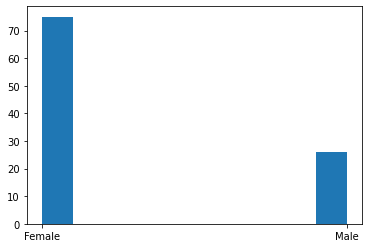

In [19]:
plt.hist(df["Choose your gender"])

In [21]:
df["Year"].value_counts()

2020    101
Name: Year, dtype: int64

In [23]:
gender = df.groupby(['Choose your gender']).size().reset_index(name='count')
gender

,Choose your gender,count
0,Female,75
1,Male,26


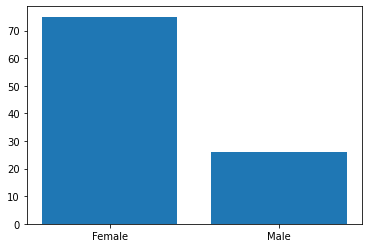

In [24]:
plt.bar(gender['Choose your gender'],gender['count'])
plt.show()

In [25]:
Depression = df.groupby(['Do you have Depression?']).size().reset_index(name='count')
Depression

,Do you have Depression?,count
0,No,66
1,Yes,35


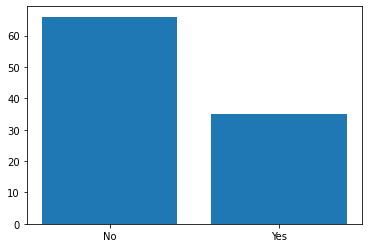

In [26]:
plt.bar(Depression['Do you have Depression?'], Depression['count'])
plt.show()

In [27]:
Anxiety = df.groupby(['Do you have Anxiety?']).size().reset_index(name='count')
Anxiety

,Do you have Anxiety?,count
0,No,67
1,Yes,34


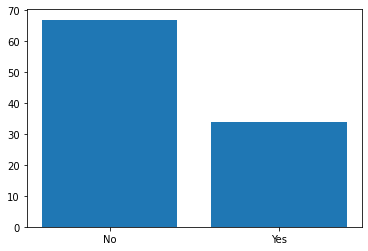

In [28]:
plt.bar(Anxiety['Do you have Anxiety?'], Anxiety['count'])
plt.show()


In [29]:
Treatment = df.groupby(['Did you seek any specialist for a treatment?']).size().reset_index(name='count')
Treatment


,Did you seek any specialist for a treatment?,count
0,No,95
1,Yes,6


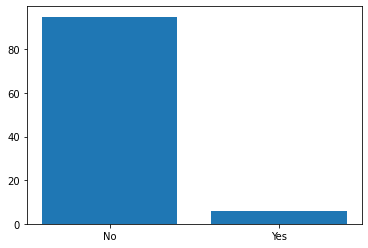

In [30]:
plt.bar(Treatment['Did you seek any specialist for a treatment?'], Treatment ['count'])
plt.show()

In [35]:
Treatment['count']

0    95
1     6
Name: count, dtype: int64